In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import requests
import time
import os
from scipy.stats import linregress

# Output File (CSV)
output_data_file20 = "csv_folder/2020/03.csv"
output_data_file19 = "csv_folder/2019/03.csv"
output_data_file18 = "csv_folder/2018/03.csv"
output_data_file17 = "csv_folder/2017/03.csv"
output_data_file16 = "csv_folder/2016/05.csv"
output_data_file15 = "csv_folder/2015/05.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
import gmaps

from api_keys import g_key

In [2]:
air_df = pd.read_csv(output_data_file20)

air_df1 = pd.read_csv(output_data_file15)
air_df.head()

,id,listing_url,host_id,host_url,host_name,host_is_superhost,host_neighbourhood,host_listings_count,street,neighbourhood,...,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,521,https://www.airbnb.com/users/show/521,Paolo,f,Culver City,1.0,"Culver City, CA, United States",Culver City,...,730,t,2,0,80.0,t,1,1,0,0.02
1,344,https://www.airbnb.com/rooms/344,767,https://www.airbnb.com/users/show/767,Melissa,f,Burbank,1.0,"Burbank, CA, United States",Burbank,...,14,t,8,2,97.0,f,1,1,0,0.18
2,2708,https://www.airbnb.com/rooms/2708,3008,https://www.airbnb.com/users/show/3008,Chas.,t,Hollywood,2.0,"Los Angeles, CA, United States",Hollywood,...,366,t,23,8,98.0,f,2,0,2,0.33
3,2732,https://www.airbnb.com/rooms/2732,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,f,Santa Monica,2.0,"Santa Monica, CA, United States",Santa Monica,...,180,t,21,3,94.0,f,2,1,1,0.20
4,2864,https://www.airbnb.com/rooms/2864,3207,https://www.airbnb.com/users/show/3207,Bernadine,f,Bellflower,1.0,"Bellflower, CA, United States",Bellflower,...,730,t,0,0,NaN,f,1,1,0,NaN


# Variable Lists


In [3]:

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json" + g_key
print(url)
# print('Start of Request')


# for city in cities:
#     query_url = url + "&q=" + city
#     # Get weather data
#     response = requests.get(query_url).json()
#     if record_counter < 40:  
#         record_counter += 1
#     else:
#         set_counter += 1
#         record_counter = 0

#     print('Processing record {} of set {} -> {}'.format(record_counter, set_counter, city))
# #     print(url)
#     try:
        
#         cloud.append(response['clouds']['all'])
#         humidity.append(response['main']['humidity'])
#         temperature.append(response['main']['temp_max'])
#         latitude.append(response['coord']['lat'])
#         longitude.append(response['coord']['lon'])
#         wind.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])
#         new_cities.append(city)
#     except:
#         print("City not found!")
#         pass

# print('End of Data')

https://maps.googleapis.com/maps/api/place/nearbysearch/json


In [9]:
# air_df= air_df['Price']
# c = air_df.loc[(air_df['price'] > 9999)]
# c


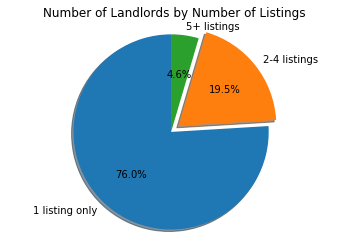

In [4]:
# Show the number of landlords by how many listings they have?
host_number = air_df.groupby(['host_id'])
# host_number = host_number.groupyby(['host_id'])
host_number = host_number.count()
#22274 hosts or landlords
#host_number.count()

host_number1 = host_number.loc[(host_number['id']) == 1]
host_number1 = host_number1['id'].count()
#16919 landlords with 1 listing only
# host_number1

host_number2 = host_number.loc[(host_number['id'] >= 2) & (host_number['id'] < 5)]
host_number2 = host_number2['id'].count()
#4339 landlords with 2-4 listings only
# host_number2

host_number5 = host_number.loc[(host_number['id'] >= 5)]
host_number5 = host_number5['id'].count()
#20 landlords with 50+ listings only
# host_number5

labels = '1 listing only', '2-4 listings', '5+ listings'
sizes = [host_number1, host_number2, host_number5]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Landlords by Number of Listings")
plt.show()


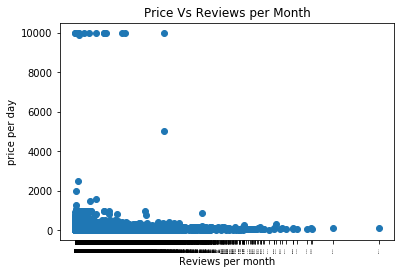

In [14]:
# Q Any relationship between the number of reviews_per_month and price per night for 1 bedroom listings 
# Varables: [‘price’] and [‘reviews_per_month’] where [‘bedrooms’] == 1
# H The higher number of reviews per month has a positive correlation with the price per night
# T-Test
# H0: μb = μ a

new_df1 = air_df.loc[(air_df['bedrooms'] == 1)]
reviews_month = new_df1['reviews_per_month']
price_paid = new_df1['price']
# Make bedrooms = 1
# review_number = air_df.groupby(['reviews_per_month'])
# review_number = review_number.count()
ran_dict = {
    "Reviews": reviews_month,
    "Price": price_paid
}

# new_df1 = new_df["Reviews"]
# new_df1 = new_df1.dropna()
# new_df1.count()

# reviews_month = reviews_month.dropna()
# price_paid = price_paid.dropna()

# host_number2 = host_number.loc[(host_number['id'] >= 2) & (host_number['id'] < 5)]
# host_number2 = host_number2['id'].count()

new_df2 = pd.DataFrame(ran_dict)
new_df3 = new_df2.dropna(axis=0, how='any', inplace=False)
# new_df3 = new_df3.loc[(new_df3['Price'] < 9000)]
# new_df3 = new_df3.loc[(new_df2['Reviews']) == 'NaN']
# new_df3
y = new_df3['Price']
x = new_df3['Reviews']
plt.scatter(x, y)
plt.xticks(x, rotation=90,fontsize=2)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")
#good_dataset_cap
plt.show()

In [19]:
print(f"The correlation coefficient {round(st.pearsonr(x,y)[0],2)}. The slope of the coefficient is -0.01, which shows a very weak or no linear relationship between price and the number of reviews per listing. The T-test is -47.26. The T-test -47.26 is less than the Critical Value of the T-test of -47.26?")
stats.ttest_ind(x, y, equal_var=False)

The correlation coefficient -0.01. The slope of the coefficient is -0.01, which shows a very weak or no linear relationship between price and the number of reviews per listing. The T-test is -47.26. The T-test -47.26 is less than the Critical Value of the T-test of -47.26?


Ttest_indResult(statistic=-47.26477478809087, pvalue=0.0)

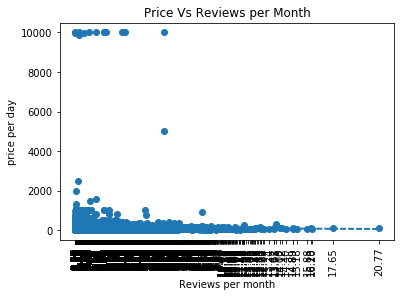

In [16]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
vc_fit = vc_slope * x + vc_int

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(x,y)
plt.plot(x,vc_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")
plt.show()

In [ ]:
round(['Tumor Volume (mm3)'].describe(),2)